In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

# 1

In [2]:
data = pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
print(data.info());
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
None
(167, 10)


In [4]:
meta = pd.read_csv('data-dictionary.csv')
print(meta.to_string())

  Column Name                                                                                                       Description
0     country                                                                                               Name of the country
1  child_mort                                                       Death of children under 5 years of age per 1000 live births
2     exports               Exports of goods and services per capita. Given in % of the GDP (Gross Domestic Product) per capita
3      health                                                    Total health spending per capita. Given in % of GDP per capita
4     imports                                        Imports of goods and services per capita. Given in % of the GDP per capita
5      Income                                                                                             Net income per person
6   Inflation                                                        The measurement of the annual growt

So nach Bauchgefühl sind einige Faktoren siginifikant für die Einteilung als Entwicklungsland, zB Kindersterblichkeit, Lebenserwartung und GDPP; andere dann wichtiger in der Unterteilung zwischen mittlerem und hohem Entwicklungsstand: Inflation, Gesundheitsausgaben, Importe

# 2

Duplikate: 0


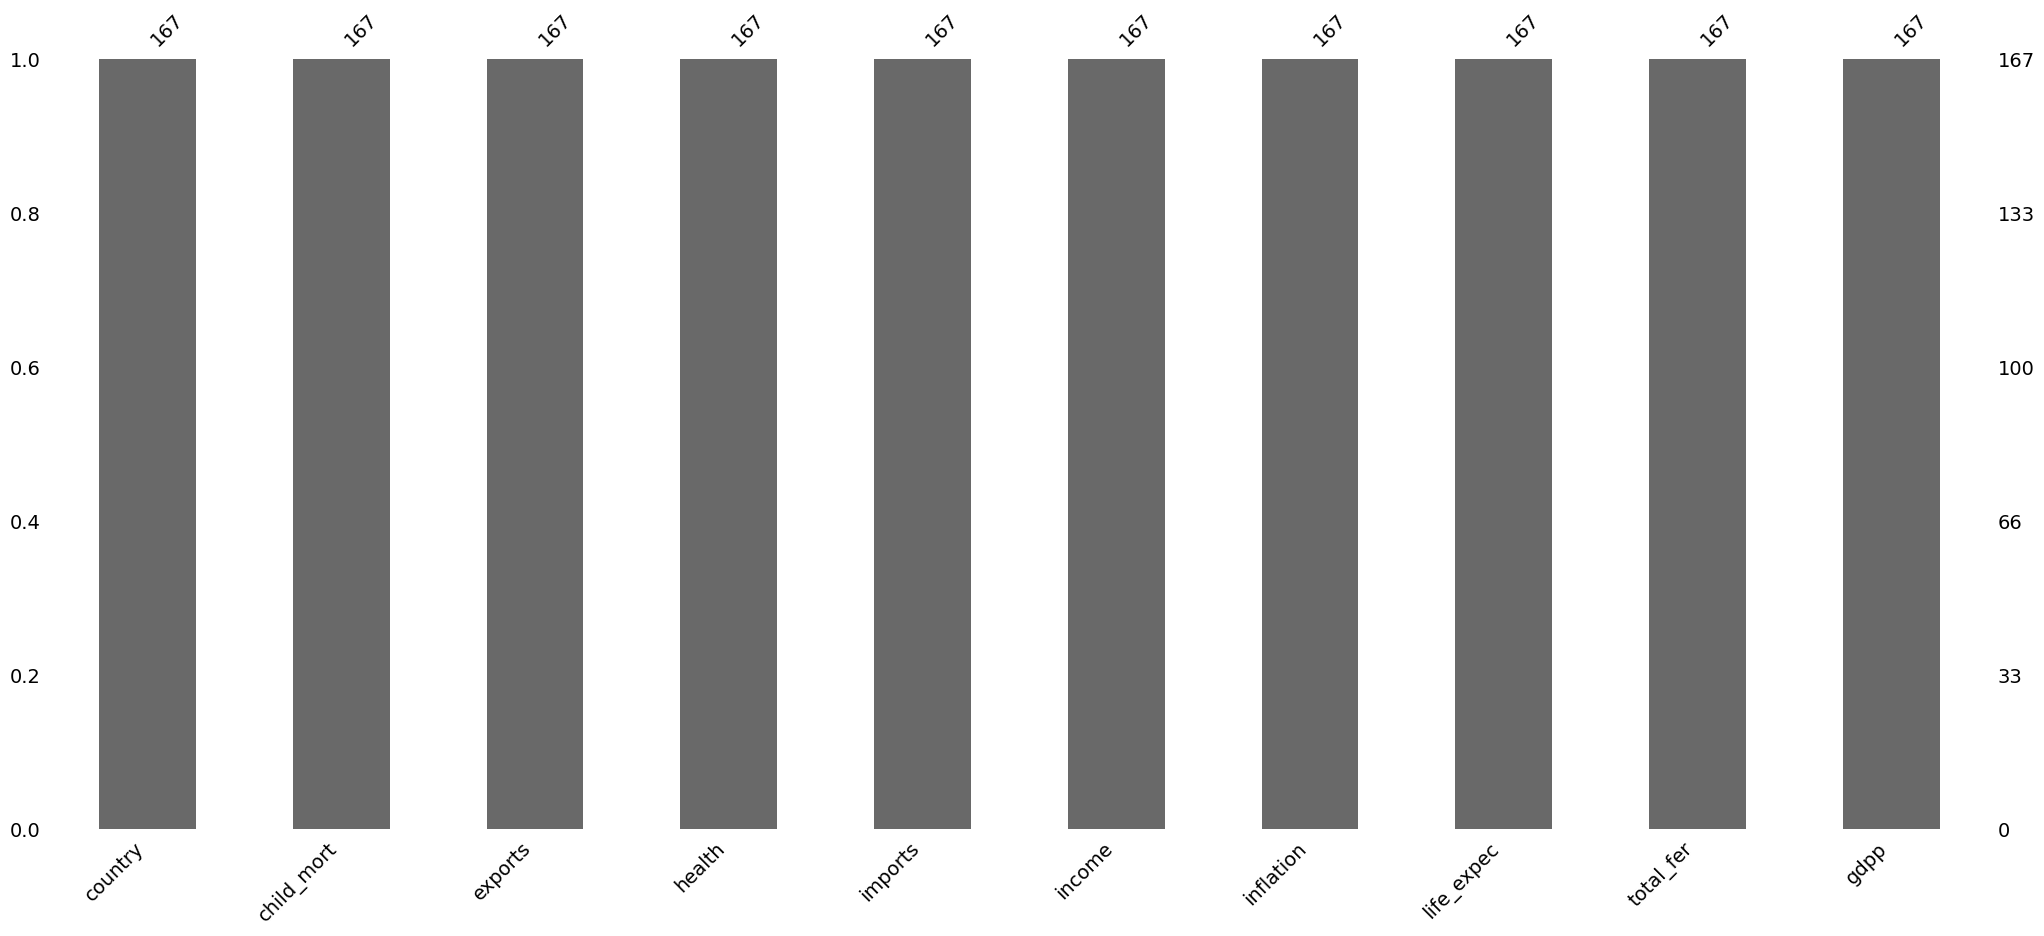

In [5]:
print(f'Duplikate: {data.duplicated().sum()}')
missingno.bar(data, fontsize = 14)
plt.show()

In [6]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


in welcher Währung ist Income und GDP geregelt?
Income wahrscheinlich in USD/a und GDPP auch in USD

In [7]:
data_num=data.drop('country', axis=1)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_num)

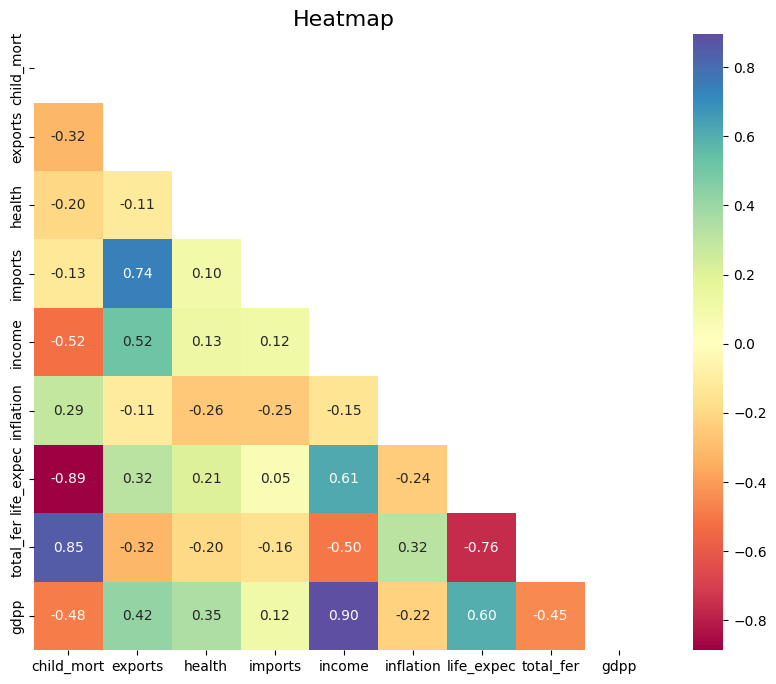

In [22]:

mask = np.triu(np.ones_like(data_num.corr(), dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(data_num.corr(), annot=True, fmt=".2f", mask=mask, cmap="Spectral")
plt.title("Heatmap", fontsize=16)
plt.show()

# 3

## ohne Scaler

In [9]:
pca = decomposition.PCA()
pca.fit(data_num)
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))
    if(i<2):
        print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component, data_num)))

1 component: 94.79% of initial variance
-0.001 x child_mort + 0.001 x exports + 0.000 x health + 0.000 x imports + 0.727 x income + -0.000 x inflation + 0.000 x life_expec + -0.000 x total_fer + 0.687 x gdpp
2 component: 5.21% of initial variance
0.001 x child_mort + -0.001 x exports + 0.000 x health + -0.000 x imports + -0.687 x income + -0.000 x inflation + -0.000 x life_expec + 0.000 x total_fer + 0.727 x gdpp
3 component: 0.0% of initial variance
4 component: 0.0% of initial variance
5 component: 0.0% of initial variance
6 component: 0.0% of initial variance
7 component: 0.0% of initial variance
8 component: 0.0% of initial variance
9 component: 0.0% of initial variance


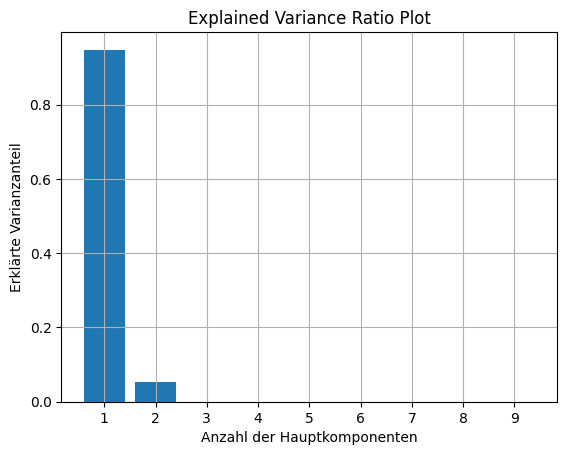

In [10]:
x_ticks = range(1, len(pca.explained_variance_ratio_) + 1)
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, tick_label=x_ticks)
plt.xlabel('Anzahl der Hauptkomponenten')
plt.ylabel('Erklärte Varianzanteil')
plt.title('Explained Variance Ratio Plot')
plt.grid()

plt.show()

### nur 1 Komponente nötig

## mit Scaler

In [11]:
pca = decomposition.PCA()
pca.fit(data_scaled)
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))
    if(i<3):
        print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component, data_num)))

1 component: 55.0% of initial variance
0.476 x child_mort + -0.170 x exports + -0.134 x health + -0.082 x imports + -0.307 x income + 0.088 x inflation + -0.421 x life_expec + 0.571 x total_fer + -0.338 x gdpp
2 component: 13.38% of initial variance
0.282 x child_mort + 0.467 x exports + 0.045 x health + 0.394 x imports + 0.404 x income + -0.002 x inflation + -0.138 x life_expec + 0.369 x total_fer + 0.476 x gdpp
3 component: 12.3% of initial variance
0.100 x child_mort + -0.391 x exports + 0.782 x health + -0.303 x imports + 0.068 x income + -0.057 x inflation + 0.008 x life_expec + 0.175 x total_fer + 0.310 x gdpp
4 component: 9.75% of initial variance
5 component: 3.78% of initial variance
6 component: 3.01% of initial variance
7 component: 1.19% of initial variance
8 component: 0.89% of initial variance
9 component: 0.69% of initial variance


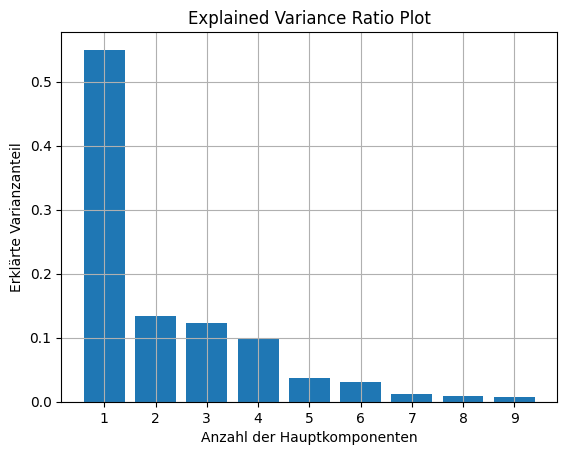

In [12]:
pca.fit(data_scaled)
x_ticks = range(1, len(pca.explained_variance_ratio_) + 1)
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, tick_label=x_ticks)
plt.xlabel('Anzahl der Hauptkomponenten')
plt.ylabel('Erklärte Varianzanteil')
plt.title('Explained Variance Ratio Plot')
plt.grid()

plt.show()

#### ca 4 Komponenten nötig

# 4

## ohne Scaler

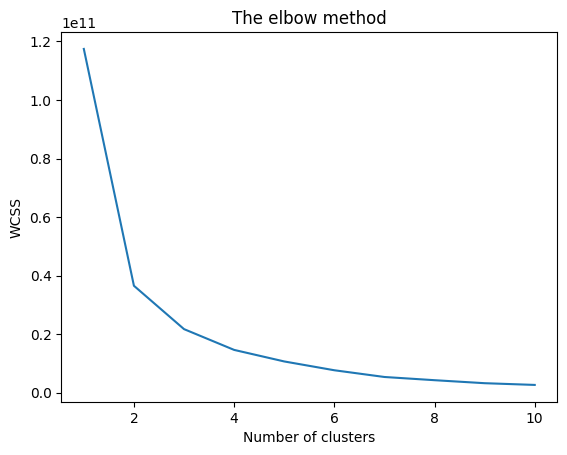

In [13]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data_num)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [14]:
pca = decomposition.PCA(n_components=2)
pca.fit(data_num)
pca_num = pca.transform(data_num)

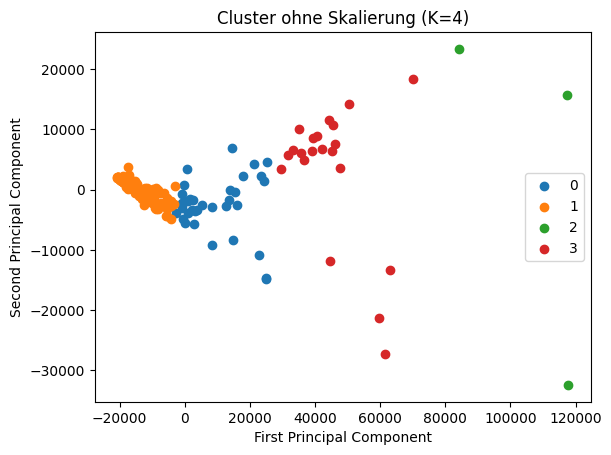

In [15]:
kmeans = KMeans(n_clusters=4, random_state=10, n_init="auto").fit(pca_num)
labels = kmeans.fit_predict(pca_num)
u_labels = np.unique(labels)
for i in u_labels:
    plt.scatter(pca_num[labels == i , 0] , pca_num[labels == i , 1] , label = i)

plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"Cluster ohne Skalierung (K={4})")
plt.legend(loc="center right")
plt.show()

In [16]:
clustered_countries = data[['country']].copy()
clustered_countries['Cluster'] = labels
cluster_groups = clustered_countries.groupby('Cluster')['country'].apply(list)
for cluster, countries in cluster_groups.items():
    print(f"Cluster {cluster}: {countries}")
    print('\n')

Cluster 0: ['Antigua and Barbuda', 'Argentina', 'Bahamas', 'Bahrain', 'Barbados', 'Chile', 'Croatia', 'Cyprus', 'Czech Republic', 'Equatorial Guinea', 'Estonia', 'Greece', 'Hungary', 'Israel', 'Kazakhstan', 'Latvia', 'Libya', 'Lithuania', 'Malaysia', 'Malta', 'New Zealand', 'Oman', 'Poland', 'Portugal', 'Romania', 'Russia', 'Saudi Arabia', 'Seychelles', 'Slovak Republic', 'Slovenia', 'South Korea', 'Spain', 'Turkey', 'Uruguay', 'Venezuela']


Cluster 1: ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Fiji', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Grenada', 'Guatemala', 'Guine

## mit Scaler

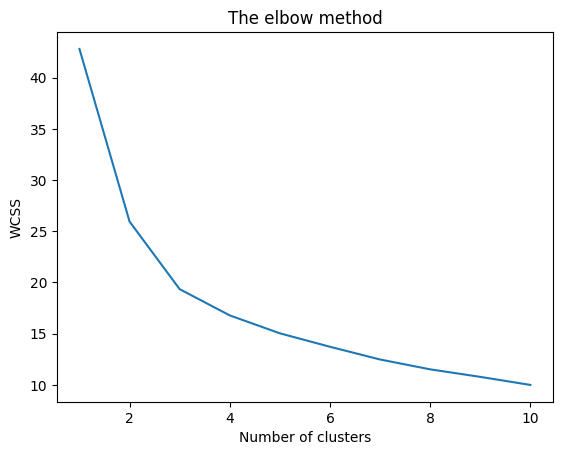

In [17]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [18]:
pca = decomposition.PCA(n_components=4)
pca.fit(data_scaled)
pca_scaled = pca.transform(data_scaled)

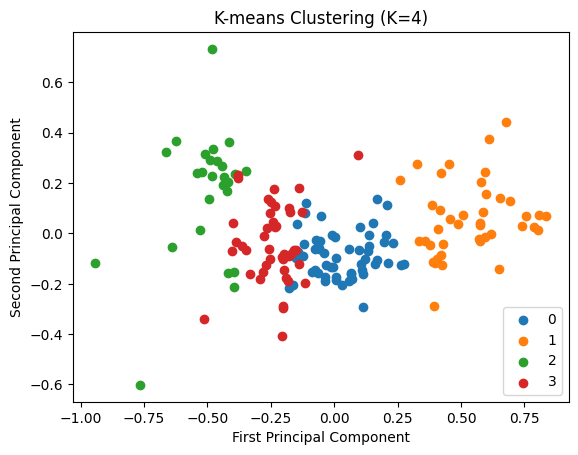

In [19]:
kmeans = KMeans(n_clusters=4, random_state=10, n_init="auto").fit(pca_scaled)
labels = kmeans.fit_predict(pca_scaled)
u_labels = np.unique(labels)
for i in u_labels:
    plt.scatter(pca_scaled[labels == i , 0] , pca_scaled[labels == i , 2] , label = i)

plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"K-means Clustering (K={4})")
plt.legend(loc="lower right")
plt.show()

In [20]:
clustered_countries = data[['country']].copy()
clustered_countries['Cluster'] = labels
cluster_groups = clustered_countries.groupby('Cluster')['country'].apply(list)
for cluster, countries in cluster_groups.items():
    print(f"Cluster {cluster}: {countries}")
    print('\n')

Cluster 0: ['Algeria', 'Argentina', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Belize', 'Bhutan', 'Bolivia', 'Botswana', 'Cambodia', 'Cape Verde', 'China', 'Colombia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Fiji', 'Gabon', 'Grenada', 'Guatemala', 'Guyana', 'India', 'Indonesia', 'Iran', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic', 'Lao', 'Libya', 'Mongolia', 'Morocco', 'Myanmar', 'Namibia', 'Nepal', 'Oman', 'Paraguay', 'Peru', 'Philippines', 'Russia', 'Samoa', 'Saudi Arabia', 'Solomon Islands', 'South Africa', 'Sri Lanka', 'St. Vincent and the Grenadines', 'Suriname', 'Tajikistan', 'Tonga', 'Turkey', 'Turkmenistan', 'Uzbekistan', 'Vanuatu', 'Venezuela']


Cluster 1: ['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Kenya', 'Kiribati', 'Lesotho', '